In [1]:
!pip install geopandas

In [2]:
!pip install rasterio

In [3]:
!pip install xarray

In [4]:
!pip install h5netcdf

In [5]:
!pip install netcdf4

In [6]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point
from rasterio.plot import show
import rasterio
import rasterio.features
import rasterio.warp

In [7]:
path="/home/ana/code/zilikons/demeter/raw_data/land_use.gpkg"
land_use=gpd.read_file(path)

In [8]:
land_use.head(4)

,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
0,DE,Berlin,DE001L1,11100,Continuous urban fabric (S.L. : > 80%),2020-10,281-DE001L1,169.628613,1549.101213,NaN,4,"MULTIPOLYGON (((4594946.630 3211089.861, 45948..."
1,DE,Berlin,DE001L1,11240,Discontinuous very low density urban fabric (S...,2020-10,50285-DE001L1,418.916845,10405.048666,NaN,153,"MULTIPOLYGON (((4567351.284 3247553.321, 45672..."
2,DE,Berlin,DE001L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-10,12889-DE001L1,379.392590,7083.683610,NaN,65,"MULTIPOLYGON (((4551825.997 3252118.948, 45518..."
3,DE,Berlin,DE001L1,12100,"Industrial, commercial, public, military and p...",2020-10,61446-DE001L1,433.426566,10985.316622,NaN,1,"MULTIPOLYGON (((4561345.202 3263503.216, 45612..."


<Axes: >

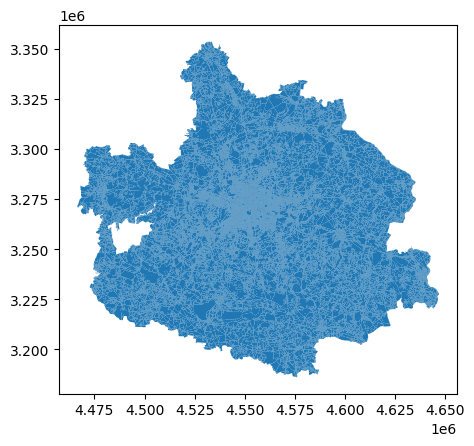

In [9]:
land_use.plot()


In [10]:
land_use.dtypes

country         object
fua_name        object
fua_code        object
code_2018       object
class_2018      object
prod_date       object
identifier      object
perimeter      float64
area           float64
comment        float64
Pop2018          int64
geometry      geometry
dtype: object

In [11]:
path="/home/ana/code/zilikons/demeter/raw_data/tree_cover/tree_cover.gpkg"
tree_cover=gpd.read_file(path)

In [12]:
tree_cover

,stl,country,fua_name,fua_code,perimeter,area,geometry
0,1,de,BERLIN,de001l1,84.271615,510.510996,"MULTIPOLYGON (((4526820.854 3258568.825, 45268..."
1,1,de,BERLIN,de001l1,93.002447,637.445669,"MULTIPOLYGON (((4531961.351 3345990.184, 45319..."
2,1,de,BERLIN,de001l1,90.976780,557.531193,"MULTIPOLYGON (((4527772.602 3335440.449, 45277..."
3,1,de,BERLIN,de001l1,95.515991,682.315279,"MULTIPOLYGON (((4525113.603 3332074.454, 45251..."
4,1,de,BERLIN,de001l1,90.907714,605.250239,"MULTIPOLYGON (((4570129.323 3315518.233, 45701..."
...,...,...,...,...,...,...,...
100494,1,de,BERLIN,de001l1,161.245199,1757.044779,"MULTIPOLYGON (((4505999.323 3222594.321, 45059..."
100495,1,de,BERLIN,de001l1,141.018604,1356.315604,"MULTIPOLYGON (((4540957.537 3215981.494, 45409..."
100496,1,de,BERLIN,de001l1,131.756886,796.506113,"MULTIPOLYGON (((4587532.550 3211523.194, 45875..."
100497,1,de,BERLIN,de001l1,120.397170,518.870849,"MULTIPOLYGON (((4567748.533 3318307.487, 45677..."


<Axes: >

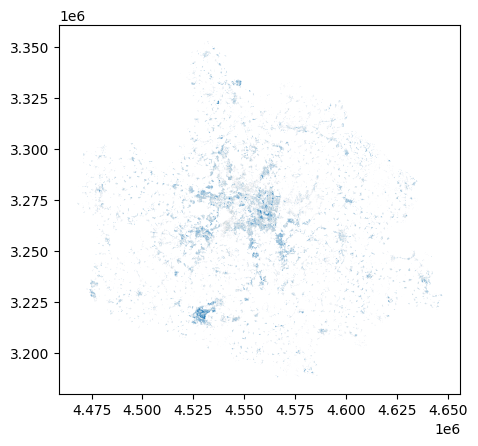

In [13]:
tree_cover.plot()

path="/home/ana/code/zilikons/demeter/raw_data/population/pop_C20.tif"

dataset = rasterio.open(path)
dataset.xy(row=0, col=0)

dataset_np=dataset.read()
data=np.squeeze(dataset_np)
df=pd.DataFrame(data)
df

#coordinates=[]
#for row in range(len(df)+1):
    #for col in df.columns:
       # coord=dataset.xy(row=row, col=col)
        #coordinates.append(coord)
        
   



In [14]:
path="/home/ana/code/zilikons/demeter/raw_data/DE.gpkg"
de=gpd.read_file(path)

<Axes: >

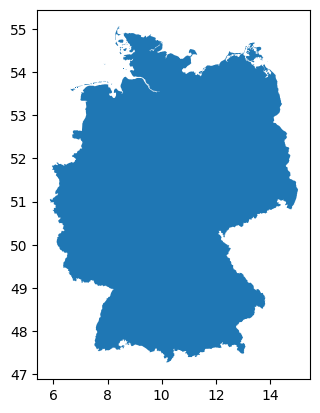

In [15]:
de.plot()

In [16]:
gbif=pd.read_csv("/home/ana/code/zilikons/demeter/raw_data/gbif.csv", sep='\t', on_bad_lines='skip')
gbif.head(2)

/tmp/ipykernel_3223/1954687947.py:1: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  gbif=pd.read_csv("/home/ana/code/zilikons/demeter/raw_data/gbif.csv", sep='\t', on_bad_lines='skip')


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,932850249,4bfac3ea-8763-4f4b-a71a-76a6f5f243d3,MCZ:Ent:203719,Animalia,Arthropoda,Insecta,Lepidoptera,Hesperiidae,Thymelicus,Thymelicus lineola,...,[no agent data],NaN,CC_BY_NC_4_0,President and Fellows of Harvard College,[no agent data],NaN,NaN,2023-03-04T15:11:18.464Z,StillImage,INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
1,932773073,7a22e1e4-f762-11e1-a439-00145eb45e9a,NaN,Plantae,Chlorophyta,Chlorophyceae,Sphaeropleales,Scenedesmaceae,Willea,Willea vilhelmii,...,W.-H. Kusber,NaN,CC_BY_4_0,NaN,W.-H. Kusber,NaN,NaN,2023-01-25T06:36:48.935Z,StillImage,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...


In [17]:
gbif.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')

In [18]:
gbif[['decimalLatitude', 'decimalLongitude']]

,decimalLatitude,decimalLongitude
0,52.474913,13.419414
1,52.456117,13.306360
2,52.455049,13.305904
3,52.455049,13.305904
4,52.452544,13.307819
...,...,...
84198,52.516667,13.383333
84199,52.516667,13.383333
84200,52.516667,13.383333
84201,52.516667,13.383333


<Axes: >

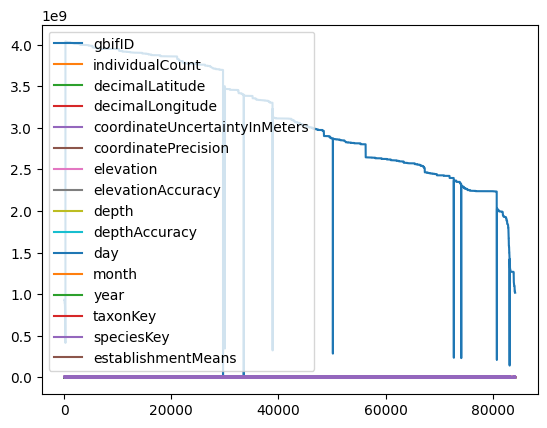

In [19]:
gbif.plot()

In [20]:
import xarray as xr

ds = xr.open_dataset('/home/ana/code/zilikons/demeter/raw_data/rural_urban_mask_Berlin.nc', decode_times=True, use_cftime=True)
df = ds.to_dataframe()




In [21]:
df

latitude  longitude  ruralurbanmask
x         y                                              
4532446.0 3253167.0  52.347431  13.103933             NaN
          3253267.0  52.348328  13.103996             NaN
          3253367.0  52.349228  13.104059             NaN
          3253467.0  52.350124  13.104122             NaN
          3253567.0  52.351025  13.104184             NaN
...                        ...        ...             ...
4572446.0 3292767.0  52.686005  13.720098             1.0
          3292867.0  52.686905  13.720175             1.0
          3292967.0  52.687801  13.720250             1.0
          3293067.0  52.688698  13.720326             1.0
          3293167.0  52.689594  13.720403             1.0

[160801 rows x 3 columns]